In [1]:
import sys

In [2]:
sys.path.insert(0, '../')

In [3]:
import numpy as np
import operator

# required for interactive plotting
from __future__ import print_function
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
import numpy.polynomial as np_poly

from IPython.display import Math
from IPython.display import Latex
from IPython.display import HTML

import seaborn as sns

from IPython.display import SVG
from IPython.display import display as i_display

In [4]:
from graph import UGraph
_graph = UGraph.graph_from_edges({'num_vertices':3, 'edges': [(0,1),(0,2)]})
_graph.graph_viz()

ModuleNotFoundError: No module named 'graph'

# Notes

## DSatur

**Saturation Degree**   
Number of different colors to which it is adjacent (colored vertices)

1. Arrange vertices by decreasing order of degrees
1. Color a vertex of maximal degree with color 1
1. Choose a vertex with a maximal saturation degree.
  * If there is an equality, choose any vertex of maximal degree in the uncolored **subgraph**
1. Color the chosen vertex with the least possible (lowest numbered) color
1. If all the vertices are colored, stop.
  * Otherwise, return to 3

Doubt:  
1. In step 3, in case of equality, should we consider the vertex of maximum degree in the subgraph induced by the uncolored vertices?  

In [23]:
?sns.xkcd_palette

[219.0, 180.0, 12.0]

In [30]:
for _rgb in sns.xkcd_palette(np.random.choice(list(sns.xkcd_rgb.keys()), 10)):
    _rgb1 = [int(x*255) for x in _rgb]
    print(_rgb, _rgb1, '#%02x%02x%02x' % tuple(_rgb1))

(1.0, 0.9803921568627451, 0.5254901960784314) [255, 250, 134] #fffa86
(1.0, 0.6039215686274509, 0.5411764705882353) [255, 154, 138] #ff9a8a
(0.5254901960784314, 0.4666666666666667, 0.37254901960784315) [134, 119, 95] #86775f
(0.0196078431372549, 0.2823529411764706, 0.050980392156862744) [5, 72, 13] #05480d
(0.0196078431372549, 0.2823529411764706, 0.050980392156862744) [5, 72, 13] #05480d
(0.7803921568627451, 0.2784313725490196, 0.403921568627451) [199, 71, 103] #c74767
(0.29411764705882354, 0.3803921568627451, 0.07450980392156863) [75, 97, 19] #4b6113
(0.4392156862745098, 0.4235294117647059, 0.06666666666666667) [112, 108, 17] #706c11
(0.7450980392156863, 0.6823529411764706, 0.5411764705882353) [190, 174, 138] #beae8a
(0.6784313725490196, 0.5058823529411764, 0.3137254901960784) [173, 129, 80] #ad8150


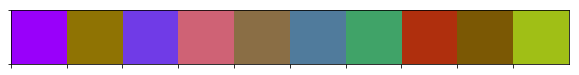

In [88]:
sns.palplot(sns.xkcd_palette(np.random.choice(list(sns.xkcd_rgb.keys()), 10)))

In [10]:
from dsatur import DSatur

def compute_dsat(graph_obj):
    dsatur = DSatur(graph_obj)
    gv = dsatur.color_graph()
    i_display(SVG(gv._repr_svg_()))
    
graphs = [UGraph.graph_from_edges({'num_vertices': 2, 'edges': [(0, 1)]}),
          UGraph.graph_from_edges({'num_vertices': 3, 'edges': [(0, 1), (1, 2)]}),
          UGraph.graph_from_edges({'num_vertices': 3, 'edges': [(0, 1), (1, 2), (2, 0)]}),
          UGraph.graph_from_edges({'num_vertices': 4, 'edges': [(0, 1), (1, 2), (2, 3), (3, 0)]})]

interactive(compute_dsat, graph_obj=enumerate(graphs))

interactive(children=(Dropdown(description='graph_obj', options=((0, <graph.UGraph object at 0x7effa7c6df28>), (1, <graph.UGraph object at 0x7effa7c6df98>), (2, <graph.UGraph object at 0x7effa7c6ddd8>), (3, <graph.UGraph object at 0x7effa7c6dda0>)), value=<graph.UGraph object at 0x7effa7c6df28>), Output()), _dom_classes=('widget-interact',))

# scratchyard

In [22]:
import heapq

In [40]:
class Obj1:
    def __init__(self, sat_degree, degree):
        self.sat_degree, self.degree = sat_degree, degree
    def __lt__(self, other):
        return (self.sat_degree < other.sat_degree) or ((self.sat_degree==other.sat_degree) and (self.degree<other.degree))
    def __cmp__(self, other):
        if (self.sat_degree < other.sat_degree):
            return -1
        elif (self.sat_degree == other.sat_degree):
            if (self.degree < other.sat_degree):
                return -1
            elif (self.degree == other.sat_degree):
                return 0
            else:
                return 1
        else:
            return 1
    def __str__(self):
        return "({},{})".format(self.sat_degree, self.degree)

In [41]:
Obj1(5,3) < Obj1(5,4)

True

In [26]:
heapq.heapify?

In [42]:
tmp = [Obj1(*x[0]) for x in [((5,1),'1'),((4,1),'2'),((5,3),'3'),((5,2),'4'),((6,3),'5')]]
[print(x) for x in tmp];

(5,1)
(4,1)
(5,3)
(5,2)
(6,3)


In [43]:
heapq.heapify(tmp)
[print(x) for x in tmp]

(4,1)
(5,1)
(5,3)
(5,2)
(6,3)


[None, None, None, None, None]